In [84]:
import pandas as pd
import numpy as np
import re
#import nltk
#from nltk.corpus import stopwords
#from nltk.stem.porter import PorterStemmer
import seaborn as sns
import operator
import matplotlib.pyplot as plt
#nltk.download('stopwords')
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kmodes.kmodes import KModes
from collections import Counter
import pickle
from sklearn.metrics import silhouette_score
%matplotlib inline

In [85]:
dataset = pd.read_csv('data_30726034.csv', encoding = "ISO-8859-1")
print(dataset.shape)

(10000, 8)


In [86]:
dataset.head(10)

,cliente,id_lote,id_conta,id_item,servico,descricao_despesa,valor,qtde
0,BRADESCO SA?DE,42704626,1135485394,486879190,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,600.2,1.0
1,BRADESCO SA?DE,42704626,1135485394,486879190,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,600.2,1.0
2,BRADESCO SA?DE,42704626,1135485394,486879192,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0
3,BRADESCO SA?DE,42704626,1135485394,486879192,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0
4,BRADESCO SA?DE,42704626,1135485394,486879191,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0
5,BRADESCO SA?DE,42704626,1135485394,486879189,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,2000.68,1.0
6,BRADESCO SA?DE,42704626,1135485394,486879192,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0
7,BRADESCO SA?DE,42704626,1135485394,486879192,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0
8,BRADESCO SA?DE,42704626,1135485394,486879191,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0
9,BRADESCO SA?DE,42704626,1135485394,486879191,30726034,ARTROPLASTIA TOTAL DE JOELHO COM IMPLANTES - T...,400.14,1.0


In [87]:
dataset.drop_duplicates(inplace = True)
print(dataset.shape)

(3520, 8)


In [88]:
data = pd.concat([dataset['servico'].astype(str),dataset['id_conta'].astype(str)],axis=1)

In [89]:
data.head()

,servico,id_conta
0,30726034,1135485394
2,30726034,1135485394
4,30726034,1135485394
5,30726034,1135485394
16,30726034,1135517427


In [91]:
# Using Elbow Method to find the right number of clusters

cost = []
for i in range(1,11):
    kmod = KModes(n_clusters=i, init='Huang', n_init=5)
    print("Fitting fot K = {}".format(i))
    %time kmod.fit(data)
    print()
    cost.append(kmod.cost_)

Fitting fot K = 1
CPU times: user 652 ms, sys: 32 ms, total: 684 ms
Wall time: 639 ms

Fitting fot K = 2
CPU times: user 864 ms, sys: 12 ms, total: 876 ms
Wall time: 865 ms

Fitting fot K = 3
CPU times: user 916 ms, sys: 8 ms, total: 924 ms
Wall time: 910 ms

Fitting fot K = 4
CPU times: user 980 ms, sys: 32 ms, total: 1.01 s
Wall time: 996 ms

Fitting fot K = 5
CPU times: user 1.01 s, sys: 4 ms, total: 1.01 s
Wall time: 1.01 s

Fitting fot K = 6
CPU times: user 1 s, sys: 8 ms, total: 1.01 s
Wall time: 1.01 s

Fitting fot K = 7
CPU times: user 1.07 s, sys: 0 ns, total: 1.07 s
Wall time: 1.06 s

Fitting fot K = 8
CPU times: user 1.09 s, sys: 20 ms, total: 1.11 s
Wall time: 1.09 s

Fitting fot K = 9
CPU times: user 1.4 s, sys: 0 ns, total: 1.4 s
Wall time: 1.38 s

Fitting fot K = 10
CPU times: user 1.18 s, sys: 8 ms, total: 1.19 s
Wall time: 1.19 s



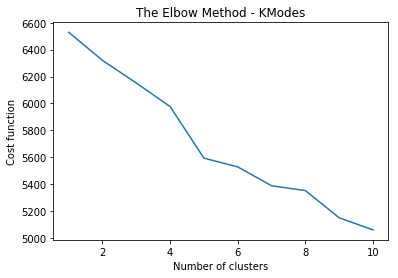

In [92]:
plt.plot(range(1,11), cost)    
plt.title('The Elbow Method - KModes')
plt.xlabel('Number of clusters')
plt.ylabel('Cost function')
plt.show()

It is not very clear the number of clusters. Let's use another method, called Silhouette Analysis

In [95]:
# Using Silhouette Score

sc = []
for i in range(2,51):
    kmod = KModes(n_clusters=i, init='Huang', n_init=5)
    print("Fitting for K = {}".format(i))
    %time y_kmod = kmod.fit_predict(data)
    score = silhouette_score(X = data, labels = y_kmod)
    print("Silhouette Score: {}".format(score))
    print()
    sc.append(score)
    

Fitting for K = 2
CPU times: user 932 ms, sys: 8 ms, total: 940 ms
Wall time: 933 ms
Silhouette Score: -0.01932503632230651

Fitting for K = 3
CPU times: user 956 ms, sys: 28 ms, total: 984 ms
Wall time: 946 ms
Silhouette Score: -0.11711497808118565

Fitting for K = 4
CPU times: user 988 ms, sys: 12 ms, total: 1e+03 ms
Wall time: 988 ms
Silhouette Score: -0.15780612282899495

Fitting for K = 5
CPU times: user 1.04 s, sys: 0 ns, total: 1.04 s
Wall time: 1.04 s
Silhouette Score: -0.20081826071280087

Fitting for K = 6
CPU times: user 1.28 s, sys: 24 ms, total: 1.3 s
Wall time: 1.28 s
Silhouette Score: -0.18850648541817247

Fitting for K = 7
CPU times: user 1.16 s, sys: 44 ms, total: 1.2 s
Wall time: 1.17 s
Silhouette Score: -0.4770483867475111

Fitting for K = 8
CPU times: user 1.42 s, sys: 32 ms, total: 1.45 s
Wall time: 1.42 s
Silhouette Score: -0.17721243484672786

Fitting for K = 9
CPU times: user 1.14 s, sys: 8 ms, total: 1.15 s
Wall time: 1.15 s
Silhouette Score: -0.298959196347971

As you can see, it wasn't possible to determine the right number of clusters, so I am just going to guess one

In [101]:
# Fitting KModes to the data

kmod = KModes(n_clusters = 10, init = 'Huang', n_init=5)
y_kmod = kmod.fit_predict(data)

In [102]:
# Adding cluster column to the dataframe

dataset_clusters = pd.concat([data, pd.DataFrame(data = y_kmod)], axis=1)
dataset_clusters = dataset_clusters.rename(columns={0:'cluster'})
dataset_clusters = dataset_clusters.dropna(axis=0)

In [103]:
dataset_clusters.shape

(1637, 3)

In [104]:
# Separating clusters by its label and getting the TUSS

clusters = []
for i in range(0,10):
    clusters.append(dict(Counter(dataset_clusters[dataset_clusters['cluster'] == i]['servico'])))
 

In [108]:
# Counting the number of incidences per cluster

for idx, clust in enumerate(clusters):
    try:
        print('Cluster {} : {} incidendias do TUSS mestre (30726034)'.format(idx, clust['30726034']))
    except:
        pass

Cluster 0 : 44 incidendias do TUSS mestre (30726034)
Cluster 1 : 2 incidendias do TUSS mestre (30726034)
Cluster 3 : 2 incidendias do TUSS mestre (30726034)
Cluster 5 : 1 incidendias do TUSS mestre (30726034)
Cluster 6 : 1 incidendias do TUSS mestre (30726034)
Cluster 7 : 1 incidendias do TUSS mestre (30726034)
Cluster 8 : 1 incidendias do TUSS mestre (30726034)
Cluster 9 : 7 incidendias do TUSS mestre (30726034)
